Alpha maxim pentru preparare:  1.7212746077394159


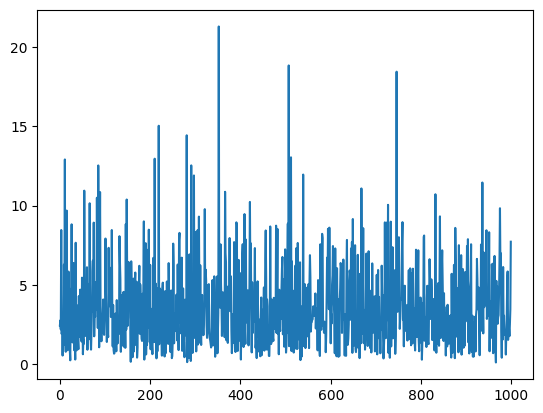

Timpul mediu de asteptare:  3.620965283056896


In [1]:
import math
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

LAMBDA_CLIENTS = 20
LAMBDA_SERVING = 2
NUM_SIMS = 1_000

def sim_alpha(alpha):
    num_clients = stats.poisson.rvs(mu=LAMBDA_CLIENTS)
    serving_times = stats.expon.rvs(scale=LAMBDA_SERVING,size=num_clients) + stats.expon.rvs(scale=alpha,size=num_clients)
    return np.max(serving_times) <= 15 # am reusit sa servim clientii cu acest alpha

def check_alpha(alpha):
    # simulate NUM_SIMS times
    prob = sum(sim_alpha(alpha) for _ in range(NUM_SIMS)) / NUM_SIMS
    return True if prob > 0.95 else False

random_alphas = np.random.uniform(0, 10, size=100)
max_alpha = max([alpha for alpha in random_alphas if check_alpha(alpha)])

print("Alpha maxim pentru preparare: ", max_alpha)
serving_time = stats.expon.rvs(scale=LAMBDA_SERVING,size=NUM_SIMS)
prepare_time = stats.expon.rvs(scale=max_alpha,size=NUM_SIMS)
total_time = serving_time + prepare_time

plt.plot(total_time)
plt.show()
print("Timpul mediu de asteptare: ", total_time.mean())